In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


K- Mean


In [2]:
# read the image
image = cv2.imread("image/Flower1.jpg")
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)


(261396, 3)


In [3]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)


In [4]:
# number of clusters (K)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None,
                                  criteria, 10, cv2.KMEANS_RANDOM_CENTERS)


In [5]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()


In [6]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]


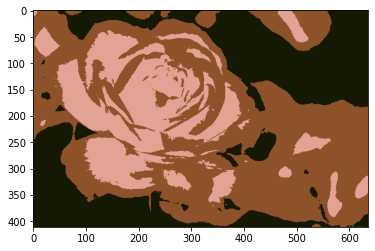

In [7]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()


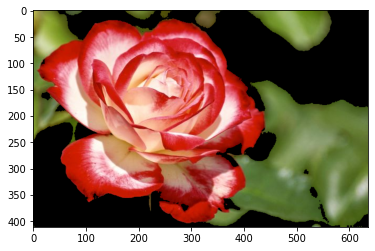

In [14]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 0
masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image
plt.imshow(masked_image)
plt.show()


Mean Shift


In [32]:
from sklearn.cluster import MeanShift, estimate_bandwidth


In [33]:
# Loading original image
originImg = cv2.imread("image/Flower1.jpg")

# Shape of original image
originShape = originImg.shape


# Converting image into array of dimension [nb of pixels in originImage, 3]
# based on r g b intensities
flatImg = np.reshape(originImg, [-1, 3])


# Estimate bandwidth for meanshift algorithm
bandwidth = estimate_bandwidth(flatImg, quantile=0.1, n_samples=100)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

# Performing meanshift on flatImg
ms.fit(flatImg)

# (r,g,b) vectors corresponding to the different clusters after meanshift
labels = ms.labels_

# Remaining colors after meanshift
cluster_centers = ms.cluster_centers_

# Finding and diplaying the number of clusters
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

# Displaying segmented image
segmentedImg = np.reshape(labels, originShape[:2])


number of estimated clusters : 6


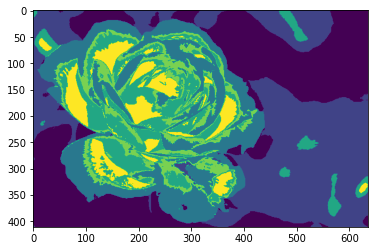

In [34]:
plt.imshow(segmentedImg)
plt.show()


Grahp cuts


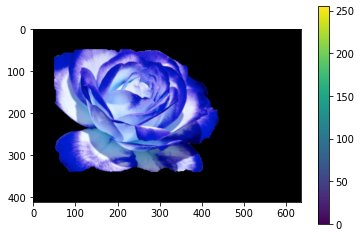

(<matplotlib.image.AxesImage at 0x16f2a2c5788>,
 None)

In [37]:
img = cv2.imread("image/Flower1.jpg")
mask = np.zeros(img.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
rect = (50, 50, 450, 290)
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
img = img*mask2[:, :, np.newaxis]
plt.imshow(img), plt.colorbar(), plt.show()
